# The Role of Expectations in OLG Dynamics

We use our OLG model to introduce how expectations affect the behavior of the economy.  Expectations refer to the way that agents forecast future uncertain variables in the economy.  In our OLG model previously, we had no stochastic (random) variables and therefore there was no forecasting problem to be solved by agents.  This setup implicitly assumed **perfect foresight**--agents can see the entire future path of economic variables.  Here, we introduce a stochastic money supply in order to investigate how agents' forecasting affects the dynamics of real money demand and inflation.  

## Stochastic Process for Money Growth $z$

We allow the growth rate of the money supply $z_t$ to be a random variable.  It is standard in macroeconomics to suppose that such a state variable is an AR(1) process so we have 

$$
z_{t+1}=(1-\rho)\bar{z}+\rho z_t+\epsilon_{t+1}
$$

where $\bar{z}$ if the steady state value of money supply growth, $\epsilon_{t+1}$ is an i.i.d. shock, and $\rho \in [0,1]$ measures how persist the shocks are.

## Equilibrium with Stochastic Money Growth

We consider the same environment as before with a log utility function and a constant population of size 1.  The household's problem is thus

$$
\begin{align*}
\max \ln(c_{1,t})+\ln(c_{2,t+1})
c_{1,t}+\nu_t m_t\leq y \\
c_{2,t+1}\leq \nu_{t+1}^e m_t+{a_{t+1}^e}
\end{align*}
$$

where $a_{t+1}^e=\left(z_{t+1}^e-1\right)\nu_{t+1}^e M_t$ is the real value of newly printed money.  Notice the use of the superscript $e$ to denote $t+1$ variables.  This is because we want to be explicit that agents need to forecast future values.  

The first-order condition to this problem gives real money demand taking the expected rate of return on money and expected future transfer of newly printed money as given,

$$
q_{t} =\frac{\beta}{1+\beta}y-\frac{1}{1+\beta}\frac{\nu_t}{\nu_{t+1}^e}a_{t+1}^e
$$

Use market clearing $\nu_t M_t=q_t$ to express the equilibrium value of newly printed money as

$$
a_{t+1}=\left(z_{t+1}^e-1\right)\frac{\nu_{t+1}^e}{\nu_t}q_t
$$

and substitute this into the first-order condition to obtain a real money demand function

$$
q_t = \frac{\beta y}{\beta+z_{t+1}^e}
$$

Notice that agents money demand today depends on what they anticipate the growth rate of the money supply will be.  

*Actual* inflation is given by market clearing which says

$$
\pi_{t+1}=z_{t+1}\frac{q_t}{q_{t+1}}
$$

The above two equations characterize the equilibrium in this economy.  The real money demand curve determines $q_t$ given expectations about money expansion.  Market clearing then determines the actual rate of inflation given real money demand.

## Simulating the Economy Under Different Forecasting Rules

We now proceed to simulate the economy under three alternatives:
1. Perfect foresight
2. Adaptive expectations
3. Rational expectations

Perfect foresight says that agents perfectly anticpate the entire path of future money supply $z_{t+1}^e=z_{t+1}$.  This is equivalent to the deterministic case we considered in our earlier model.  

Adaptive expectations assumes that agents form their forecast based on past experience, adjusting their predictions slows as new information becomes available.  Formally we model this forecasting rule as

$$
z_{t+1}^e = (1-\lambda)z_t^e+\lambda z_t
$$

Agents prediction about the future money supply is based on their past prediction (the first term), and the newly observed actual money supply (the second term).  The parameter $\lambda$ controls how much agents update their past prediction based on new information.

Rational expectations assumes that agents know the stochastic process for money supply, but cannot see the future shock.  They only know that, on average, the process follows

$$
E[z_{t+1}]=(1-\rho)z_t+\rho z_t
$$

In the simulation below we generate a deterministic path for $z_t$ from an AR(1) process with a one-time positive shock at $t=1$.  Agents money demand $q_{t+1}(z_{t+1}^e)$ is then computed under the three alternatives:
1. Perfect forsight: $z_{t+1}^e=z_{t+1}$
2. Adaptive expectations: $z_{t+1}^e = (1-\lambda)z_t^e+\lambda z_t$
3. Rational expectations : $z_{t+1}^e=(1-\rho)z_t+\rho z_t$

Given the path for $q_t$, we then compute realized inflation from the market clearing condition

$$
\pi_{t+1}=z_{t+1}\frac{q_t}{q_{t+1}}
$$

We let $\beta=.95,y=1,\bar{z}=1.02,\rho=0.5,\lambda=0.5$ and introduce a one-time ten percent shock to money growth $\epsilon = 0.1$ at time $t=1$ and simulate the economy fro 30 periods.

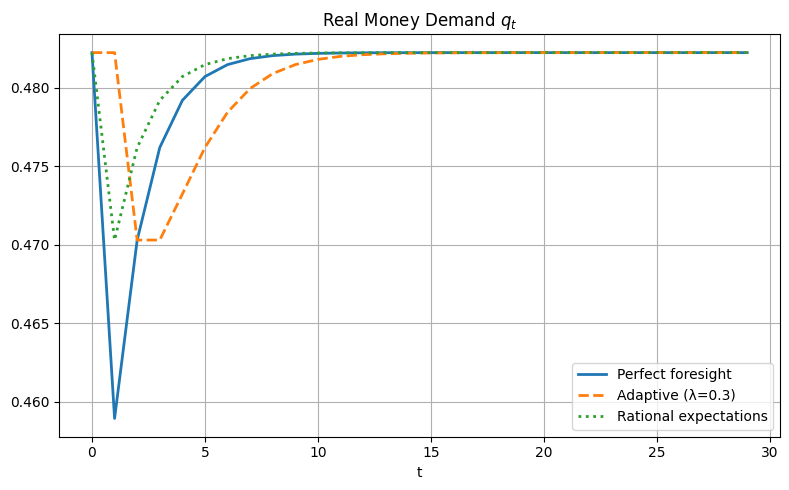

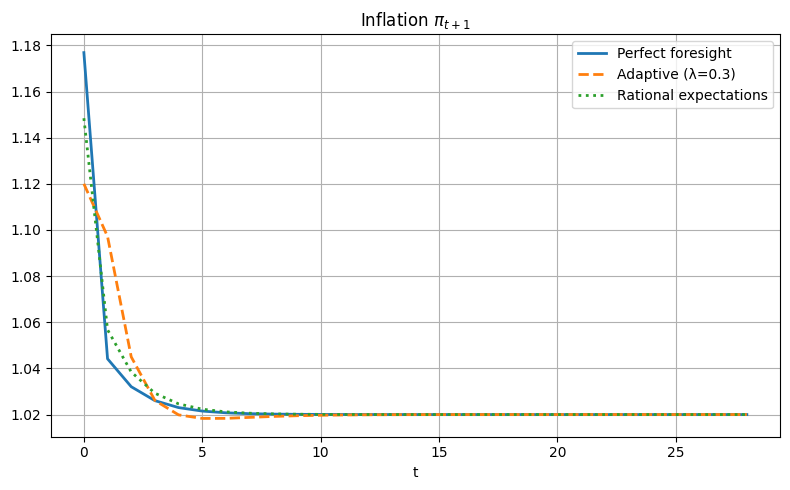

Peak |q_pf - q_ad| = 0.02329630447043829
Peak |q_pf - q_re| = 0.011359831635337492
Peak |pi_pf - pi_ad| = 0.05685279187817294
Peak |pi_pf - pi_re| = 0.02842639593908647


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# --- Parameters ---
beta = 0.95
y = 1.0
z_bar = 1.02      # steady-state money growth
rho = 0.5         # persistence of z_t
T = 30            # periods
eps = np.zeros(T)
eps[1] = 0.1     # one unexpected shock at t=1
lambda_ad = .5   # adaptive gain

# --- Generate realized z_t (money growth) ---
z = np.zeros(T)
z[0] = z_bar
for t in range(1, T):
    z[t] = (1 - rho) * z_bar + rho * z[t-1] + eps[t]

# --- EXPECTATIONS ---

# 1. Perfect foresight (knows full realized path)
z_pf_e = z.copy()

# 2. Adaptive expectations
z_ad_e = np.zeros(T)
z_ad_e[0] = z_bar
for t in range(1, T):
    z_ad_e[t] = (1 - lambda_ad) * z_ad_e[t-1] + lambda_ad * z[t-1]

# 3. Rational expectations (knows AR(1) law, not future shocks)
z_re_e = np.zeros(T)
for t in range(T-1):
    z_re_e[t] = (1 - rho) * z_bar + rho * z[t]
z_re_e[-1] = z_re_e[-2]  # terminal condition

# --- MONEY DEMAND and INFLATION ---

def money_demand(z_exp):
    return beta * y / (beta + z_exp)

def inflation(z_real, q):
    return z_real[1:] * q[:-1] / q[1:]

# Compute series
q_pf = money_demand(z_pf_e)
q_ad = money_demand(z_ad_e)
q_re = money_demand(z_re_e)

pi_pf = inflation(z, q_pf)
pi_ad = inflation(z, q_ad)
pi_re = inflation(z, q_re)

# --- PLOTS ---

plt.figure(figsize=(8, 5))
plt.plot(q_pf, label='Perfect foresight', lw=2)
plt.plot(q_ad, '--', label='Adaptive (λ=0.3)', lw=2)
plt.plot(q_re, ':', label='Rational expectations', lw=2)
plt.title("Real Money Demand $q_t$")
plt.xlabel("t")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(pi_pf, label='Perfect foresight', lw=2)
plt.plot(pi_ad, '--', label='Adaptive (λ=0.3)', lw=2)
plt.plot(pi_re, ':', label='Rational expectations', lw=2)
plt.title("Inflation $\\pi_{t+1}$")
plt.xlabel("t")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# --- Peak differences (optional diagnostics) ---
print("Peak |q_pf - q_ad| =", np.max(np.abs(q_pf - q_ad)))
print("Peak |q_pf - q_re| =", np.max(np.abs(q_pf - q_re)))
print("Peak |pi_pf - pi_ad| =", np.max(np.abs(pi_pf - pi_ad)))
print("Peak |pi_pf - pi_re| =", np.max(np.abs(pi_pf - pi_re)))


First compare the dynamics of the perfect foresight equilibrium (PFE) with the adaptive expectations equilibrium (AEE).  Under PFE agents perfectly *anticipate* the entire path of money growth.  Because $q_t$ depends on the one-step-ahead forecast $z_{t+1}$, if agents know $z_{t+1}$ will spike and then mean-revert, they will choose $q_t$ today to reflect that future path.  Hence, the one-time ten percent increase in money growth is fully internalized resulting in a sharp reduction in real money balances, followed by a quick recovery which inherits the exact same dynamics as the AR(1) process for money supply.  Conversely, under AEE agents' forecasts update gradually causing a *lagged* response to real money demand.  At the time of the shock they under-react relative to PFE since their forecast $z^e$ is lagging actual $z$.  Real money demand falls less and gradually recovers as beliefs update.

Because inflation depends on both current real money demand and future real money demand, the different reactions from PFE and AEE generate different inflation dynamics.  PFE generates a sharp rise in inflation since agents dramatically reduce real balances in reaction to the shock.  AEE realizes less of a spike in inflation because beliefs update slowly.  The difference in peak inflation between PFE adn AEE is about 5 percent.  Inflation then reverts to its steady state level very fast under PFE and slower under AEA.

Now consider rational expectations equilibrium (REE).  Agents only know the statistical law of motion for money growth (the AR(1) process), but not the actual shocks.  When the shock hits, they only partially adjust their forecast depending on how persistent the shock is.  Compared to PFE, expectations are still forward looking, but restricted by the unpredictability of shocks.  Therefore, REE exhibits slower dynamics compared to PFE, but faster compared to AEE.  The peak difference in inflation between REE and PFE is about 3 percent.  This difference is very sensitive to the persistence of the shock process.  If $\rho$ is small, then $z_t$ today tells REE agents very little about $z_{t+1}$.  Their expectation is therefore a muted version of the realized shock: they underreact more relative to PF.  PF agents see through short-lived shocks immediately, while RE agents learn only through observed data and the known AR(1) law.